# Hands On Session: Dimensionality Reduction, SVD & PCA

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaberaTalukder/Chen_Institute_DataSAI_for_Neuroscience/blob/main/07_05_22_day1_overview/code/diy_notebooks/dimensionality_reduction.ipynb)

In [1]:
# All Imports - alphabetically ordered with shortcuts
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import loadmat

# Hint: do not reinvent the wheel! If you want to do something, a preexisiting package, library, function, etc. exists to do what you want. Google & Stack Overflow are your friends 😃

## Load Data
#### Dataset background: this is calcium imaging data from one male mouse. We have already converted the calcium imaging videos into continuous neural signals, so you don't have to worry about it (you're welcome 😘). The male mouse has different visitors in his cage throughout the recording, and we'll explore dimensionality reduction by determining if it's 🐭❤️ or 🐭 😡!

In [2]:
data_path = '/home/sabra/Documents/Chen_Institute_DataSAI_for_Neuroscience/07_05_22_day1_overview/data/hypothalamus_calcium_imaging_remedios_et_al.mat'
hypothalamus_data = loadmat(data_path);

## How many data arrays are contained in hypothalamus_data?
#### Hint: what happens if you type the variable name in a cell and run the cell?

In [3]:
# Enter code here:

In [4]:
# Solution:
# There are 3 data arrays contained in hypothalamus_data: 'attack_vector', 'neural_data', 'sex_vector'

## Extract the N data arrays into N separate variables.

In [5]:
# Enter code here:

In [6]:
# Soultion:
neural_data = hypothalamus_data['neural_data']
attack_vector = hypothalamus_data['attack_vector']
sex_vector = hypothalamus_data['sex_vector']

## What is the dimensionality of each of the N data arrays?
## What do you think the dimensions represent?

In [7]:
# Enter code here:

In [8]:
# Soultion:
print(neural_data.shape)
print(attack_vector.shape)
print(sex_vector.shape)

# neural_data --> (115, 18561) which is number_of_neurons x time
# attack_vector --> (1, 18561) which is whether_or_not_attacking x time
# sex_vector --> (1, 18561) which is intruder_sex x time

(115, 18561)
(1, 18561)
(1, 18561)


## What is the distribution of the values inside the arrays?
#### Hint: the answer to this question can be a picture!
#### Hint Hint: sometimes functions run faster if you transform a matrix a vector first.

In [9]:
# Enter code here:

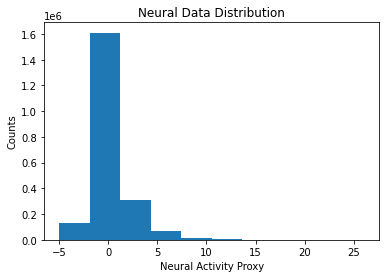

In [10]:
# Solution:
_ = plt.hist(np.ndarray.flatten(neural_data))
_ = plt.title('Neural Data Distribution')
_ = plt.xlabel('Neural Activity Proxy')
_ = plt.ylabel('Counts')

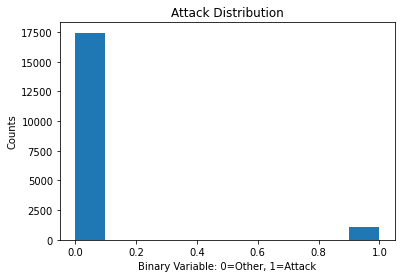

In [11]:
# Solution:
_ = plt.hist(np.ndarray.flatten(attack_vector))
_ = plt.title('Attack Distribution')
_ = plt.xlabel('Binary Variable: 0=Other, 1=Attack')
_ = plt.ylabel('Counts')

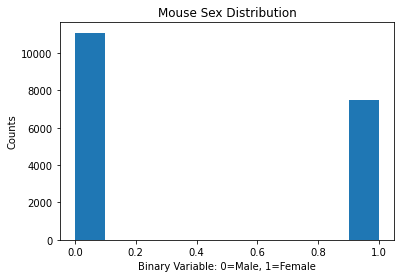

In [12]:
# Solution:
_ = plt.hist(np.ndarray.flatten(sex_vector))
_ = plt.title('Mouse Sex Distribution')
_ = plt.xlabel('Binary Variable: 0=Male, 1=Female')
_ = plt.ylabel('Counts')

## Plot the N data arrays.
#### Hint: sometimes the most expeditious way to visualize data is to treat it as an image!
#### Hint Hint: one visualization might give you something you dont expect, but is the problem the data?

In [13]:
# Enter code here:

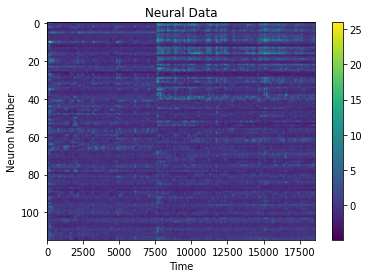

In [14]:
# Soultion:
_ = plt.imshow(neural_data, aspect='auto', cmap='viridis')
_ = plt.colorbar()
_ = plt.title('Neural Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Neuron Number')

The top figure looks green even though the data is binary, just because of the visulization not the data. Prove it to yourself by plotting a zoomed in piece!


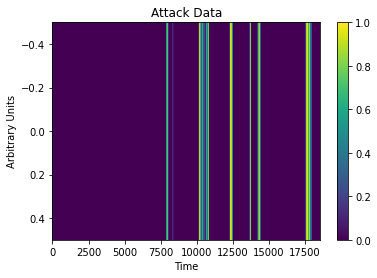

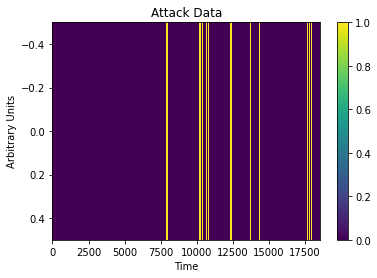

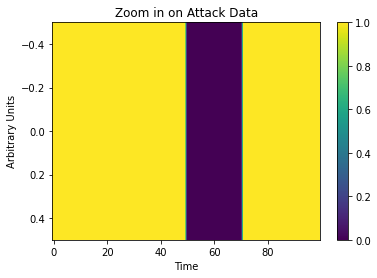

In [56]:
_ = plt.imshow(attack_vector, aspect='auto', cmap='viridis')
_ = plt.colorbar()
_ = plt.title('Attack Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Arbitrary Units')

_ = plt.figure()
_ = plt.imshow(attack_vector, aspect='auto', cmap='viridis', interpolation='nearest')
_ = plt.colorbar()
_ = plt.title('Attack Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Arbitrary Units')

print('The top figure looks green even though the data is binary, \
just because of the visulization not the data. Prove it to yourself by plotting a zoomed in piece!')

_ = plt.figure()
_ = plt.imshow(attack_vector[:, 10200:10300], aspect='auto', cmap='viridis')
_ = plt.colorbar()
_ = plt.title('Zoom in on Attack Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Arbitrary Units')
# _ = plt.xticks([10200, 10250, 10300])

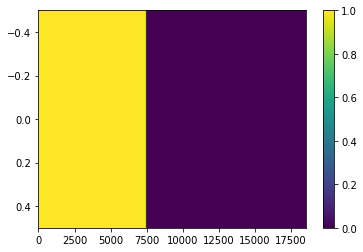

In [34]:
_ = plt.imshow(sex_vector, aspect='auto')
_ = plt.colorbar()

## What do the values inside the arrays represent?

In [ ]:
# Enter answer here (code can be used, but not required):

In [ ]:
# Solution:
# neural_data --> the values in the arrays are a proxy for neuron firing.
# Large numbers mean high activity, small numbers mean low activity.

# attack_vector --> 

In this section, we're going to use tools learnt in Section 1 and learn about methods to uncover relationships between hypothalamic neural activity and social behavior using a dataset from [Remedios et ., 2017, Nature](https://https://www.nature.com/articles/nature23885)

In [ ]:
# Import neccessary modules and helper functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA

# Set color map for indicating behaviors
color_names = ["grey",
               "red",
               "forest green",
               "amber",
               "windows blue"]
colors = sns.xkcd_palette(color_names)
colors_sex = sns.xkcd_palette(color_names[2:5])
colors_beh = sns.xkcd_palette(color_names)

cmap_beh = ListedColormap(colors)
cmap_sex = ListedColormap(colors[2:4])

def forceAspect(ax,aspect):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
    
def plot_trajectory_beh(z, x,a1,a2,ax=None, alpha = 1, ls="-", colors = colors):
    zcps = np.concatenate(([0], np.where(np.diff(z))[0] + 1, [z.size]))
    if ax is None:
        fig = plt.figure(figsize=(4, 4))
        ax = fig.gca()
    for start, stop in zip(zcps[:-1], zcps[1:]):
        ax.plot(x[start:stop + 1, a1],
                x[start:stop + 1, a2],
                lw=1, ls=ls,
                color=colors[z[start] % len(colors)],
                alpha=alpha)
    return ax

*Include explanation about dataset here with figure*

what is the data?, please pull out the 3 relevant data types.
store them as named variables?

Let's visualize the neural data and plot an activity matrix, a plot showing the behaviors perfomed by the resident mouse and some example neurons

In [ ]:
# Create a plot for showing behavior raster, neural raster & an example neuron

plt.figure(figsize=[10,10])
ax1 = plt.subplot(311)
ax1.imshow(sex_vector, aspect='auto', cmap=cmap_sex, alpha = 0.8, interpolation = 'nearest')
forceAspect(ax1,aspect=10)
ax1.set_yticks([])
ax1.set_title('sex of intruder')
ax1.text(0,1.2,'female intruder ',color = colors_sex[1],fontsize=16)
ax1.text(0,1.5,'male intruder',color = colors_sex[0],fontsize=16)

ax2 = plt.subplot(312)
ax2.imshow(neural_data, aspect='auto')
ax2.set_title('neural activity')
ax2.set_ylabel('neurons')

ax3 = plt.subplot(313)
ax3.plot(neural_data[0,])
ax3.set_title('activity of cell 1')
ax3.set_ylabel('df/f')
ax3.set_xlabel('frames')

plt.tight_layout() 


make them plot it? maybe easier to give it to them

Let's now use what we learnt in Section 1 to perform PCA on this data and examine the top 2 principal components

In [ ]:
# perform PCA
pca_neural = PCA(n_components=2)
pca_neural.fit_transform (neural_data)
neural_pcs = pca_neural.components_

# plot PCA, colored by intruder sex
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
plot_trajectory_beh(sex_vector[0,:],neural_pcs.T,0,1,ax=ax, colors = colors_sex)
ax.set_title('PCA on VMHvl data',fontsize = 14)
ax.set_xlabel('$PC_1$',fontsize=16)
ax.set_ylabel('$PC_2$',fontsize=16)
ax.text(0.02,0.02,'female intruder ',color = colors_sex[1],fontsize=16)
ax.text(0.02,0.017,'male intruder',color = colors_sex[0],fontsize=16)
